# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the and function

In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

In [3]:
for i in range(len(X)):
    print(X[i], y[i])

[0 0] 0
[0 1] 0
[1 0] 0
[1 1] 1


In [4]:
def add_noise_data(input_data, input_labels, n_points, mean, scale):
    """
    Create a noise verstion of the input data
    
    Params:
        input_data: base input data
        input_labels: base input labels
        n_points: the number of needed points
        mean, scale: the gaussian data
    """
    raw_X = []
    raw_labels = []
    
    noise = np.random.normal(loc=mean, scale=scale, size=(n_points, 2))
    for i in range(n_points):
        k = np.random.randint(len(input_data))
        
        raw_X.append([input_data[k][0] + noise[i][0], 
                      input_data[k][1] + noise[i][1]])
        
        raw_labels.append(input_labels[k])
        
    return np.array(raw_X), np.array(raw_labels)

In [5]:
X_noise, y_noise = add_noise_data(X, y, 100, 0., 0.2)

In [6]:
def plot_clusters(_x, labels, std, list_labels = ['False', 'True']):
    colors = ['#4EACC5', '#FF9C34']
    y_m = labels
    for k, col in zip(range(len(labels)), colors):
        my_members = y_m == k
        print(_x[my_members].shape)
        plt.scatter(_x[my_members, 0], _x[my_members, 1], marker='o', label = list_labels[k])
    plt.title('Noisy AND dataset with std = %.1f' % std)
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

(76, 2)
(24, 2)


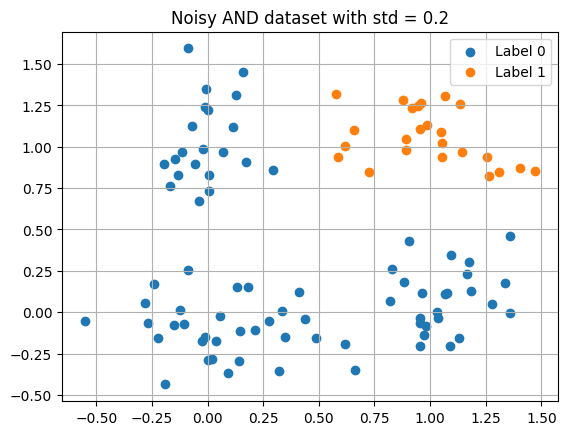

In [7]:
plot_clusters(X_noise, y_noise, 0.2, list_labels=['Label 0', 'Label 1'])

(72, 2)
(28, 2)


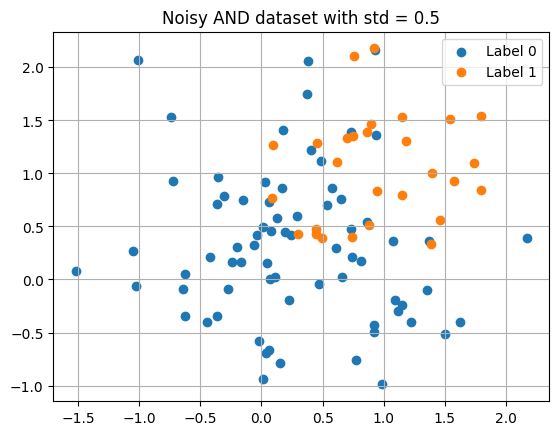

In [8]:
X_high_noise, y_high_noise = add_noise_data(X, y, 100, 0., 0.5)
plot_clusters(X_high_noise, y_high_noise, 0.5, list_labels=['Label 0', 'Label 1'])

In [9]:
for i in range(20):
    print('(%.1f, %.1f)' % (X_high_noise[i][0], X_high_noise[i][1]), y_high_noise[i])

(1.1, 0.4) 0
(1.5, -0.5) 0
(0.8, 0.2) 0
(0.8, 2.1) 1
(1.1, 1.5) 1
(1.0, -1.0) 0
(1.5, 1.5) 1
(0.2, 0.9) 0
(-0.6, -0.3) 0
(0.2, 0.4) 0
(1.7, 1.1) 1
(0.7, 0.5) 0
(1.1, 0.8) 1
(1.4, 0.4) 0
(-0.2, 0.2) 0
(1.4, -0.1) 0
(-0.2, 0.7) 0
(0.4, 0.5) 1
(0.4, 0.4) 1
(-0.3, -0.1) 0


In [10]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000) -> None:
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1/(1+np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)

            dw = (1/num_samples)*np.dot(X.T, (predictions-y))
            db = (1/num_features)*np.sum(predictions-y)